Vectorization in deep learning refers to expressing computations (especially over data arrays) using matrix and vector operations instead of loops. It's a crucial optimization technique used to accelerate computations and leverage modern hardware like GPUs.

In [17]:
import numpy as np
a=np.array([1,2,3,4])
print(a)

[1 2 3 4]


## time differnence between loop and vectorization
vectorization replaces loop so it takes less time

In [18]:
import time
a=np.random.rand(100000)
b=np.random.rand(100000)
tic=time.time()
c=np.dot(a,b)
toc=time.time()
print(c)
print("vectorized version: "+str(1000*(toc-tic))+"ms")
c=0
tic=time.time()
for i in range (100000):
    c+=a[i]*b[i]
toc=time.time()
print(c)
print("For loop: "+str(1000*(toc-tic))+"ms")

24933.98519923136
vectorized version: 25.369644165039062ms
24933.985199231374
For loop: 33.53261947631836ms


Network Summary:
Input layer: 3 features

Hidden layer: 4 neurons

Output layer: 1 neuron

Activation function: sigmoid for both layers

Number of examples: m = 5 (as an example)

In [19]:
import numpy as np

# Activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Input data: 3 features, 5 examples
X = np.array([[0.1, 0.2, 0.3, 0.4, 0.5],
              [0.6, 0.7, 0.8, 0.9, 1.0],
              [1.1, 1.2, 1.3, 1.4, 1.5]])  # Shape: (3, 5)

# Parameters
np.random.seed(1)
W1 = np.random.randn(4, 3)  # 4 neurons, 3 inputs
b1 = np.random.randn(4, 1)  # Bias for 4 hidden neurons
W2 = np.random.randn(1, 4)  # Output neuron, 4 hidden neurons
b2 = np.random.randn(1, 1)  # Bias for output neuron


# Without Vectorization:

In [20]:
m = X.shape[1]
A1_loop = []
A2_loop = []

for i in range(m):
    x_i = X[:, i].reshape(-1, 1)  # (3, 1)
    
    z1_i = np.dot(W1, x_i) + b1        # (4, 1)
    a1_i = sigmoid(z1_i)
    
    z2_i = np.dot(W2, a1_i) + b2       # (1, 1)
    a2_i = sigmoid(z2_i)
    
    A1_loop.append(a1_i)
    A2_loop.append(a2_i)

# Stack outputs
A1_loop = np.hstack(A1_loop)  # Shape: (4, m)
A2_loop = np.hstack(A2_loop)  # Shape: (1, m)


# with vectorization

In [21]:
Z1 = np.dot(W1, X) + b1      # Shape: (4, 5)
A1 = sigmoid(Z1)

Z2 = np.dot(W2, A1) + b2     # Shape: (1, 5)
A2 = sigmoid(Z2)


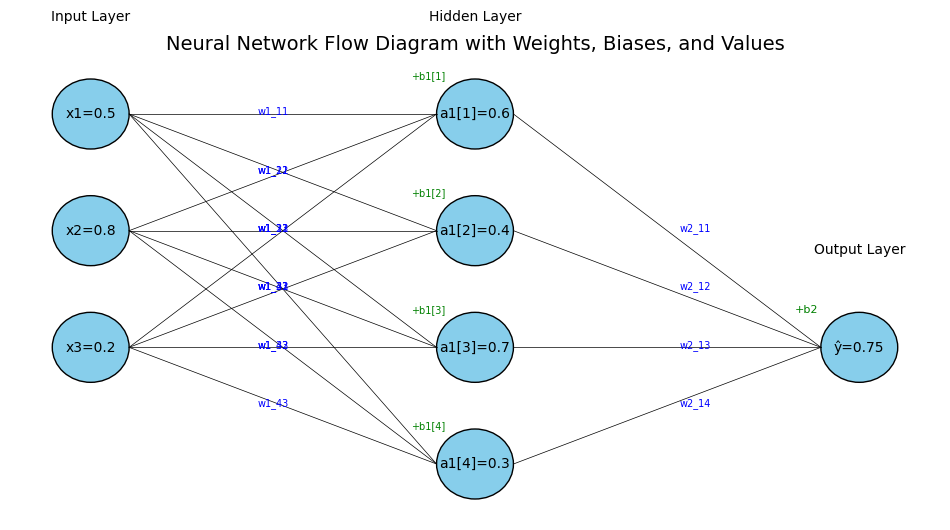

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')

# Layer positions
def draw_circle(x, y, label):
    circle = plt.Circle((x, y), 0.3, color='skyblue', ec='black')
    ax.add_patch(circle)
    ax.text(x, y, label, fontsize=10, ha='center', va='center')

# Input layer with values
input_values = ['x1=0.5', 'x2=0.8', 'x3=0.2']
for i, label in enumerate(input_values):
    draw_circle(1, 4 - i, label)

# Hidden layer with values (example)
hidden_values = ['a1[1]=0.6', 'a1[2]=0.4', 'a1[3]=0.7', 'a1[4]=0.3']
for i, label in enumerate(hidden_values):
    draw_circle(4, 4 - i, label)

# Output layer with value
output_value = 'ŷ=0.75'
draw_circle(7, 2, output_value)

# Connections from input to hidden with weights and biases
for i in range(3):
    for j in range(4):
        ax.plot([1.3, 3.7], [4 - i, 4 - j], 'k-', lw=0.5)
        mid_x = (1.3 + 3.7) / 2
        mid_y = (4 - i + 4 - j) / 2
        ax.text(mid_x - 0.2, mid_y, f'w1_{j+1}{i+1}', fontsize=7, color='blue')

# Biases to hidden layer
for j in range(4):
    ax.text(3.5, 4 - j + 0.3, f'+b1[{j+1}]', fontsize=7, color='green')

# Connections from hidden to output with weights
for j in range(4):
    ax.plot([4.3, 6.7], [4 - j, 2], 'k-', lw=0.5)
    mid_x = (4.3 + 6.7) / 2
    mid_y = (4 - j + 2) / 2
    ax.text(mid_x + 0.1, mid_y, f'w2_{1}{j+1}', fontsize=7, color='blue')

# Bias to output layer
ax.text(6.5, 2.3, '+b2', fontsize=8, color='green')

# Labels
ax.text(1, 4.8, 'Input Layer', ha='center', fontsize=10)
ax.text(4, 4.8, 'Hidden Layer', ha='center', fontsize=10)
ax.text(7, 2.8, 'Output Layer', ha='center', fontsize=10)

plt.title('Neural Network Flow Diagram with Weights, Biases, and Values', fontsize=14)
plt.show()


# With backwadrd propagation

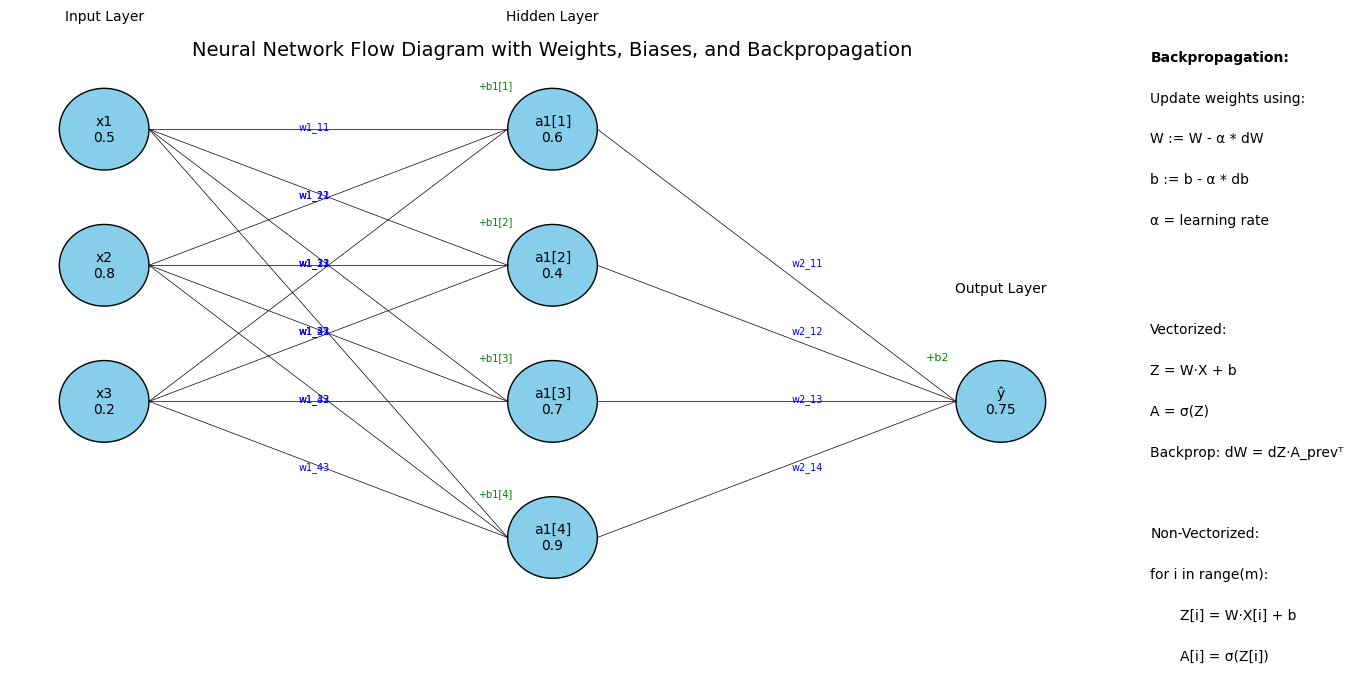

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(14, 7))
ax.axis('off')

# Draw a circle for each neuron
def draw_circle(x, y, label):
    circle = plt.Circle((x, y), 0.3, color='skyblue', ec='black')
    ax.add_patch(circle)
    ax.text(x, y, label, fontsize=10, ha='center', va='center')

# Input layer
input_vals = {'x1': 0.5, 'x2': 0.8, 'x3': 0.2}
for i, (label, val) in enumerate(input_vals.items()):
    draw_circle(1, 4 - i, f'{label}\n{val}')

# Hidden layer
hidden_vals = [0.6, 0.4, 0.7, 0.9]
for i, val in enumerate(hidden_vals):
    draw_circle(4, 4 - i, f'a1[{i+1}]\n{val}')

# Output layer
output_val = 0.75
draw_circle(7, 2, f'ŷ\n{output_val}')

# Connections from input to hidden
for i in range(3):
    for j in range(4):
        ax.plot([1.3, 3.7], [4 - i, 4 - j], 'k-', lw=0.5)
        mid_x = (1.3 + 3.7) / 2
        mid_y = (4 - i + 4 - j) / 2
        ax.text(mid_x - 0.2, mid_y, f'w1_{j+1}{i+1}', fontsize=7, color='blue')

# Biases to hidden
for j in range(4):
    ax.text(3.5, 4 - j + 0.3, f'+b1[{j+1}]', fontsize=7, color='green')

# Connections from hidden to output
for j in range(4):
    ax.plot([4.3, 6.7], [4 - j, 2], 'k-', lw=0.5)
    mid_x = (4.3 + 6.7) / 2
    mid_y = (4 - j + 2) / 2
    ax.text(mid_x + 0.1, mid_y, f'w2_{1}{j+1}', fontsize=7, color='blue')

# Bias to output
ax.text(6.5, 2.3, '+b2', fontsize=8, color='green')

# Labels
ax.text(1, 4.8, 'Input Layer', ha='center', fontsize=10)
ax.text(4, 4.8, 'Hidden Layer', ha='center', fontsize=10)
ax.text(7, 2.8, 'Output Layer', ha='center', fontsize=10)

# Backpropagation (conceptual annotation)
ax.text(8, 4.5, 'Backpropagation:', fontsize=10, fontweight='bold')
ax.text(8, 4.2, 'Update weights using:')
ax.text(8, 3.9, 'W := W - α * dW')
ax.text(8, 3.6, 'b := b - α * db')
ax.text(8, 3.3, 'α = learning rate')

# Vectorized vs Non-Vectorized notes
ax.text(8, 2.5, 'Vectorized:')
ax.text(8, 2.2, 'Z = W·X + b')
ax.text(8, 1.9, 'A = σ(Z)')
ax.text(8, 1.6, 'Backprop: dW = dZ·A_prevᵀ')

ax.text(8, 1.0, 'Non-Vectorized:')
ax.text(8, 0.7, 'for i in range(m):')
ax.text(8.2, 0.4, 'Z[i] = W·X[i] + b')
ax.text(8.2, 0.1, 'A[i] = σ(Z[i])')

plt.title('Neural Network Flow Diagram with Weights, Biases, and Backpropagation', fontsize=14)
plt.show()


In [24]:
import numpy as np

# Input features (m = 2 examples, n_x = 3 features)
X = np.array([[0.1, 0.3],
              [0.2, 0.6],
              [0.3, 0.9]])  # shape (3, 2)

Y = np.array([[1, 0]])  # shape (1, 2)

# Dimensions
n_x = 3   # input features
n_h = 4   # hidden units
n_y = 1   # output units
m = X.shape[1]  # number of examples

# Initialize weights and biases
np.random.seed(1)
W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(n_y, n_h)
b2 = np.zeros((n_y, 1))

# Activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)


In [25]:
# Forward Propagation
Z1 = np.dot(W1, X) + b1         # shape (4, 2)
A1 = sigmoid(Z1)                # shape (4, 2)
Z2 = np.dot(W2, A1) + b2        # shape (1, 2)
A2 = sigmoid(Z2)                # shape (1, 2)

print("Output A2:\n", A2)


Output A2:
 [[0.46509335 0.54918819]]


In [26]:
# Loss derivative (Binary Cross-Entropy)
dZ2 = A2 - Y                    # shape (1, 2)
dW2 = (1/m) * np.dot(dZ2, A1.T)  # shape (1, 4)
db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)  # shape (1, 1)

dA1 = np.dot(W2.T, dZ2)         # shape (4, 2)
dZ1 = dA1 * sigmoid_derivative(A1)  # shape (4, 2)
dW1 = (1/m) * np.dot(dZ1, X.T)  # shape (4, 3)
db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)  # shape (4, 1)
